<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 9, 2016: script creation, splitting
<br>November 7, 2016: check $\Phi_{ij}$ polys, `power` closed form
<br>November {4,5,6}, 2016: `inverse`, `power`, `sqrt` $g$ polys
<br>November 3, 2016: Fibonacci, $\mathcal{C}$, $d_{n,k}$ matrix for $\Phi$ polys
<br>November 2, 2016: fix $\Phi$ polynomials def, $\mathcal{P}$
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with tutorial functions on simple matrix.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a

from commons import *
from matrix_functions import *
from sequences import *
import functions_catalog

init_printing()

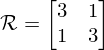

In [3]:
M = define(Symbol(r'\mathcal{R}'), Matrix([[3, 1], [1, 3]]))
M

In [4]:
m = M.rhs.rows # degree of \Xi minimal polynomial

In [5]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

In [6]:
with lift_to_Lambda(Phi_poly) as Phi_fn:
    pass

Phi_fn, Phi_fn(z, 3, j)

In [7]:
eigendata = spectrum(M)
eigendata

In [9]:
data, eigenvals, multiplicities = eigendata.rhs

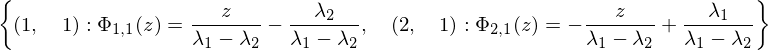

In [12]:
Phi_polynomials = component_polynomials(eigendata)
Phi_polynomials

In [13]:
f, h = Function('f'), Function('h')
function_eq = define(let=f(z), be=h(z))
function_eq

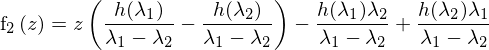

In [14]:
g = Hermite_interpolation_polynomial(function_eq, eigendata, Phi_polynomials)
g

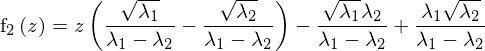

In [15]:
g.subs({h: Lambda(z, sqrt(z))})

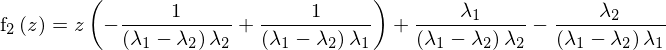

In [16]:
g.subs({h: Lambda(z, 1/z)})

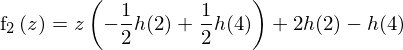

In [18]:
t = g.subs(eigenvals)
t

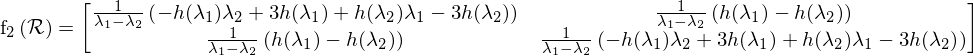

In [19]:
with lift_to_matrix_function(g) as g:
    res = g(M)

res

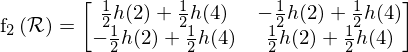

In [22]:
define(res.lhs, res.rhs.subs(eigenvals))

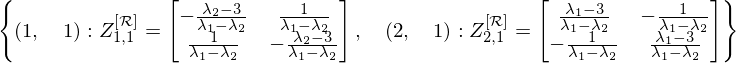

In [23]:
cmatrices = component_matrices(M, Phi_polynomials)
cmatrices

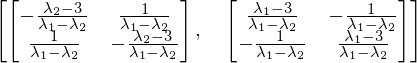

In [25]:
Zi1 = list(cm.rhs.as_immutable() for (i, j), cm in cmatrices.items() if j == 1)
Zi1

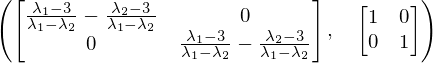

In [29]:
s = zeros(m)
for Z in Zi1:
    s += Z
s, s.subs(eigenvals)

### `const`

In [30]:
f_const = define(let=f(z), be=r)
f_const

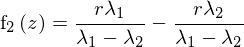

In [37]:
g_const = Hermite_interpolation_polynomial(f_const, eigendata, Phi_polynomials)
g_const

In [38]:
g_const = g_const.subs(eigenvals)
g_const

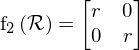

In [39]:
with lift_to_matrix_function(g_const) as G_const:
    m_const = G_const(M)
m_const

### `identity`

In [40]:
f_identity = Eq(f(z), z)
f_identity

In [41]:
g_identity = Hermite_interpolation_polynomial(f_identity, eigendata, Phi_polynomials, matrix_form=True)
g_identity

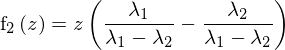

In [42]:
g_identity = Hermite_interpolation_polynomial(f_identity, eigendata, Phi_polynomials, matrix_form=False)
g_identity

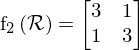

In [43]:
with lift_to_matrix_function(g_identity) as G_identity:
    m_identity = G_identity(M)
m_identity

### `sqrt`

In [44]:
f_sqrt = define(let=f(z), be=sqrt(z))
f_sqrt

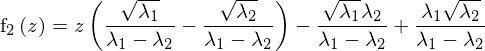

In [45]:
g_sqrt = Hermite_interpolation_polynomial(f_sqrt, eigendata, Phi_polynomials)
g_sqrt

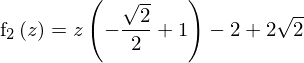

In [46]:
g_sqrt = g_sqrt.subs(eigenvals)
g_sqrt

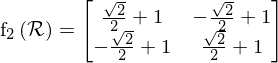

In [47]:
with lift_to_matrix_function(g_sqrt) as G_sqrt:
    m_sqrt = G_sqrt(M)
m_sqrt

In [50]:
assert (m_sqrt.rhs**2).applyfunc(simplify) == M.rhs

### `power`

In [51]:
f_power = define(let=f(z), be=z**r)
f_power

In [52]:
g_power = Hermite_interpolation_polynomial(f_power, eigendata, Phi_polynomials, matrix_form=True)
g_power

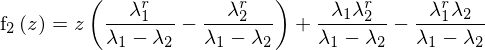

In [54]:
g_power = Hermite_interpolation_polynomial(f_power, eigendata, Phi_polynomials)
g_power

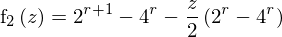

In [55]:
g_power = g_power.subs(eigenvals)
g_power.simplify()

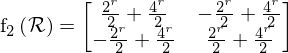

In [56]:
with lift_to_matrix_function(g_power) as G_power:
    m_power = G_power(M)
m_power

In [59]:
assert (M.rhs**r).applyfunc(simplify) == m_power.rhs

### `log`

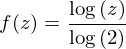

In [61]:
f_log = define(let=f(z), be=log(z, 2))
f_log

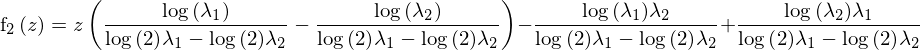

In [62]:
g_log = Hermite_interpolation_polynomial(f_log, eigendata, Phi_polynomials)
g_log

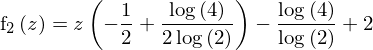

In [63]:
g_log = g_log.subs(eigenvals)
g_log

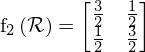

In [64]:
with lift_to_matrix_function(g_log) as G_log:
    M_log = G_log(M)
M_log

### `inverse`

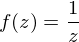

In [65]:
f_inverse = define(let=f(z), be=1/z)
f_inverse

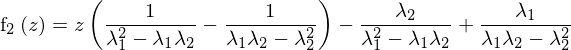

In [66]:
g_inverse = Hermite_interpolation_polynomial(f_inverse, eigendata, Phi_polynomials)
g_inverse

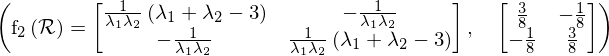

In [67]:
with lift_to_matrix_function(g_inverse) as G_inverse:
    m_inverse = G_inverse(M)

m_inverse, m_inverse.rhs.subs(eigenvals)

### `expt`

In [68]:
f_expt = define(let=f(z), be=exp(z))
f_expt

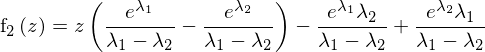

In [69]:
g_expt = Hermite_interpolation_polynomial(f_expt, eigendata, Phi_polynomials)
g_expt

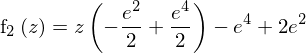

In [70]:
g_expt = g_expt.subs(eigenvals)
g_expt

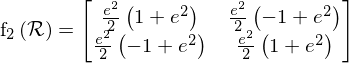

In [71]:
with lift_to_matrix_function(g_expt) as G_expt:
    m_expt = G_expt(M)
m_expt

### `geometric`

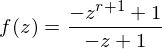

In [72]:
f_geo = define(let=f(z), be=(1-z**(r+1))/(1-z))
f_geo

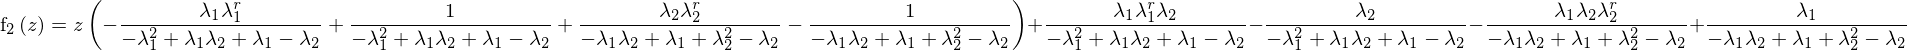

In [73]:
g_geo = Hermite_interpolation_polynomial(f_geo, eigendata, Phi_polynomials)
g_geo

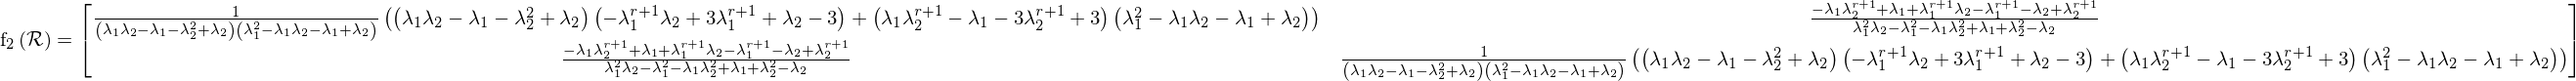

In [79]:
with lift_to_matrix_function(g_geo) as G_geo:
    m_geo = G_geo(M)

m_geo

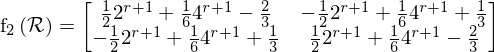

In [82]:
m_geo= define(m_geo.lhs, m_geo.rhs.subs(eigenvals))
m_geo

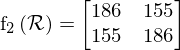

In [83]:
define(m_geo.lhs, m_geo.rhs.subs({r:4}))

In [84]:
s = Function('s')
sum_def = define(let=s(z), be=Sum(z**i, (i, 0, 4)).doit())
sum_def

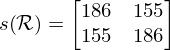

In [86]:
with lift_to_matrix_function(sum_def) as sum_fn:
    R = sum_fn(M)
R

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.